## Import packages ##

In [1]:
import numpy as np
import seaborn as sns
sns.set(context='talk', style='ticks')
import matplotlib.pyplot as plt

import lab3
from lab3.experiment.group import ExperimentGroup
from lab3.analysis.spatial.abstract_spatial_tuning import SpatialTuning
from lab3.filters.time_filters import IsRunning

## Define analysis ##

In [2]:
SpatialTuning.constructor_ids

['nbins', 'bins', 'sigma']

In [3]:
spatial_tuning_strategy = SpatialTuning(nbins=100)

In [4]:
spatial_tuning_strategy

position,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99


## Build experiment group ##

In [14]:
trial_ids = [27738, 28611, 28617] 

grp = ExperimentGroup.from_trial_ids(trial_ids)

In [16]:
cohort = grp.to_cohort()
cohort

,
Mouse,ImagingExperiment
aac22,27738
aac31,28611
aac33,28617


## Apply analysis to dataset ##

Analysis objects are versatile: the same analysis can be run on different signal types and sets of ROIs. These are specified with the `signal_spec` dictionary at runtime 

In [18]:
signal_spec = {
    'signal_type': 'dfof',
    'label': 'PYR'
}

It is conventional to compute spatial tuning only on running epochs. We can accomplish this easily using a filter (see the Filters tutorials for more information)

In [17]:
is_running = IsRunning()

In [19]:
result = cohort.apply(spatial_tuning_strategy, signal_spec=signal_spec, time_filter=is_running)

/home/zhenrui/code/lab3/lab3/core/helpers.py:79: UserWarning: The Analysis `SpatialTuning` is not type-annotated (consider adding annotations to allow type-checking)
  warnings.warn(f"The Analysis `{name}` is not type-annotated "


In [20]:
result.dropna()

position                                             0.00      0.01      0.02  \
Mouse ImagingExperiment LapEvent roi_label                                      
aac22 27738             4        0000-0010-0095  0.048464  0.023742  0.004004   
                                 0000-0010-0166  0.130340  0.105815  0.086994   
                                 0000-0010-0377  0.078576  0.117006  0.154759   
                                 0000-0010-0453  0.089039  0.090995  0.089580   
                                 0000-0011-0122  0.216808  0.221073  0.216660   
...                                                   ...       ...       ...   
aac33 28617             30       0000-0494-0388  0.021803  0.026810  0.035415   
                                 0000-0497-0150  0.168362  0.150013  0.131755   
                                 0000-0499-0168 -0.001230 -0.000292  0.003607   
                                 0000-0499-0202  0.056291  0.062601  0.068323   
                                 0000-0500-0420  0.067341  0.071678  0.076508   

position                                             0.03      0.04      0.05  \
Mouse ImagingExperiment LapEvent roi_label                                      
aac22 27738             4        0000-0010-0095 -0.007285 -0.009757 -0.005865   
                                 0000-0010-0166  0.076614  0.074173  0.076327   
                                 0000-0010-0377  0.185737  0.206145  0.215134   
                                 0000-0010-0453  0.086764  0.085354  0.087814   
                                 0000-0011-0122  0.204905  0.188626  0.170910   
...                                                   ...       ...       ...   
aac33 28617             30       0000-0494-0388  0.046094  0.056604  0.064718   
                                 0000-0497-0150  0.114776  0.100242  0.088772   
                                 0000-0499-0168  0.009611  0.015987  0.021042   
                                 0000-0499-0202  0.072003  0.072500  0.069427   
                                 0000-0500-0420  0.082242  0.088147  0.093022   

position                                             0.06      0.07      0.08  \
Mouse ImagingExperiment LapEvent roi_label                                      
aac22 27738             4        0000-0010-0095  0.000787  0.007371  0.013026   
                                 0000-0010-0166  0.078737  0.078416  0.075349   
                                 0000-0010-0377  0.214275  0.206340  0.194108   
                                 0000-0010-0453  0.095053  0.105788  0.116778   
                                 0000-0011-0122  0.154034  0.138953  0.125452   
...                                                   ...       ...       ...   
aac33 28617             30       0000-0494-0388  0.069020  0.069451  0.067268   
                                 0000-0497-0150  0.080439  0.075220  0.073512   
                                 0000-0499-0168  0.024092  0.025910  0.028607   
                                 0000-0499-0202  0.063420  0.056030  0.049040   
                                 0000-0500-0420  0.096057  0.097183  0.096832   

position                                             0.09  ...      0.90  \
Mouse ImagingExperiment LapEvent roi_label                 ...             
aac22 27738             4        0000-0010-0095  0.018738  ...  0.138003   
                                 0000-0010-0166  0.072405  ...  0.157780   
                                 0000-0010-0377  0.179889  ...  0.092927   
                                 0000-0010-0453  0.123936  ...  0.055237   
                                 0000-0011-0122  0.112878  ...  0.120038   
...                                                   ...  ...       ...   
aac33 28617             30       0000-0494-0388  0.064324  ...  0.058285   
                                 0000-0497-0150  0.076115  ...  0.619011   
                                 0000-0499-0168  0.034991  ...  0.026532   
  

In [25]:
# Compute mean over laps
mean_result = result.groupby(["Mouse", "ImagingExperiment", "roi_label"]).agg("mean")

In [26]:
# Peak normalize and sort
tuning_curves = mean_result.divide(mean_result.max(axis=1), axis=0)
order = tuning_curves.apply(np.argmax, axis=1)

## Plot analyzed data ##

Text(0, 0.5, 'sorted ROI #')

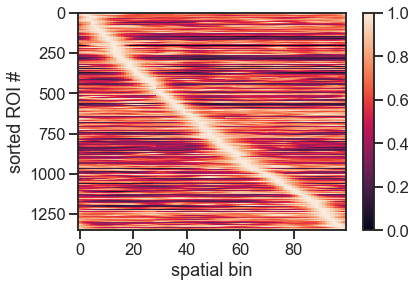

In [27]:
fig, ax = plt.subplots()

im = ax.imshow(tuning_curves.iloc[order.argsort()].dropna(), aspect='auto', vmin=0, vmax=1)
fig.colorbar(im)

ax.set_xlabel("spatial bin")
ax.set_ylabel("sorted ROI #")